In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# FORCE learning

Your job is to fill the blanks and train a network to generate a self-sustained simple oscillation

## Init and check dynamics in an untrained random network

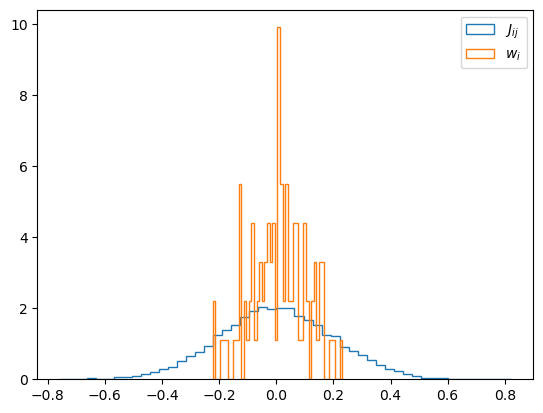

In [23]:
# set size and gain
N = 100
g = 2.0

# generate random coupling matrix
J = g * np.random.randn(N, N) / np.sqrt(N)
J0 = J.copy() # save for later

# init readout vector at random
w = np.random.randn(N) / np.sqrt(N)
w0 = w.copy() # save for later
w_fb = 2. * np.random.rand(N) - 1

# let's inspect the weight distributions before training
plt.hist(J.flatten(), bins=50, histtype="step", density=True, label='$J_{ij}$');
plt.hist(w, bins=50, histtype="step", density=True, label='$w_i$');
plt.legend();

## check untrained dynamics and readout signal

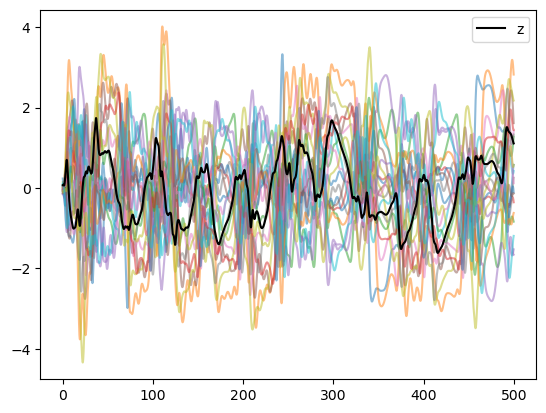

In [24]:
# set total simulation time and integration time-step
T = 500
dt = 0.1
titot = int(T/dt)

xs = np.empty((titot, N)) # activity record
zs = np.empty(titot) # readout record
x = 0.1 * np.random.randn(N) # set random initial condition
for ti in range(titot):
    r = np.tanh(x) # pass activity through nonlinearity
    h = J @ r # compute incoming current
    x = (1. - dt) * x + dt * h # update network state
    z = w @ r # compute readout
    xs[ti] = x # record network state
    zs[ti] = z # record readout

# plot records
ts = np.arange(titot) * dt
plt.plot(ts, xs[:,:20], alpha=0.5);
plt.plot(ts, zs, color='black', label='z');
plt.legend();

## Set task

We will ask the readout to reproduce an oscillation with a fixed frequency

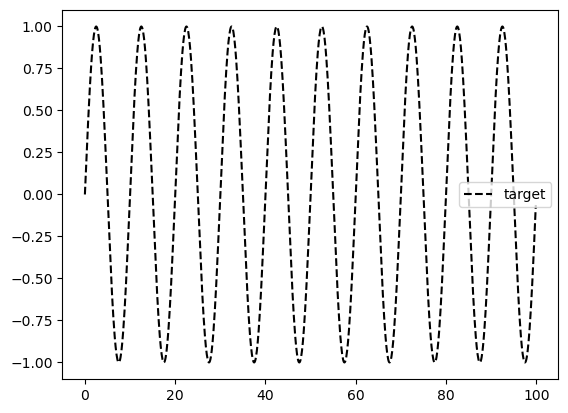

In [25]:
def target_func(t, freq = 0.1):
    return np.sin(2 * np.pi * freq * t)

# take a look at the target function
ts = np.arange(0, 100, dt)
plt.plot(ts, target_func(ts), '--', color="black", label="target");
plt.legend();

## Train network

### Define a test function

For a self-sustained dynamics it is important test during the course of training by initializing the network properly otherwise we will encounter a phase difference. That's why you should pass the state of the network x to the test function

In [27]:
def test(t, dt, x, J, w, w_fb, titot, target_func):
    # allocate records
    xs = np.zeros((titot, N))
    zs = np.zeros(titot)
    zs_desired = np.zeros(titot)
    # run
    err = 0.
    for ti in range(titot):
        t += dt
        
        # update network ...
        
        # compute error ...
        
        # store records

    err /= titot
    
    return xs, zs, zs_desired, err

### Set training parameters

In [28]:
T_discard = 0
T_train = 100
T_test = 50
test_every_t = 1

alpha = 1
verbose = True

### run training 

In [ ]:
# compute useful quantities
titot_discard = int(T_discard/dt) # it's best to discard and initial transient before learning starts
titot_train = int(T_train/dt)
titot_test = int(T_test/dt)
titot = titot_discard + titot_train
ts = np.arange(titot) * dt
ts_test = np.arange(titot_test) * dt

test_every_ti = int(test_every_t/dt)

# init records
xs = np.zeros((titot, N))
zs = np.zeros(titot)
zs_desired = np.zeros(titot)
errs_train = np.zeros(titot)
errs_test = []
tested = []

# init training matrices ...

# init stuff
err_test_best = 1e10
outs_best, zs_best = None, None

# run
t = 0.
start_time = time.time()
for ti in range(titot):
    t += dt

    # IMPLEMENT NETWORK UPDATE AND ERROR COMPUTATION
    
    # update network ...

    # compute error ...
    
    # store records ...

    # learn ...
    if ti > titot_discard:
        
    # IMPLEMENT LEARNING RULE TO TRAIN READOUT
    
    # update P ...
    
    # update w ...

    # test once in a while
    if ti > 0 and ti % test_every_ti == 0:
        elapsed_time = start_time - time.time()

        # test routine
        xs_test, zs_test, zs_desired_test, err_test = test(t, dt, x, J, w, w_fb, titot_test, target_func)
        tested += [t]
        errs_test += [err_test]
    
        # print some info
        to_print = "t: {:.2f} tr: {:.1f} tst: {:.2f}".format(t, err_train, err_test)
        
        # store best test weights
        improved = err_test < err_test_best
        if improved:
            to_print += " *"
            err_test_best = err_test
            w_best = w.copy()
            zs_best = zs_test.copy()
            zs_desired_best = zs_desired_test.copy()
            xs_best = xs_test.copy()
        
        if verbose:
            print(to_print)
            
        start_time = time.time()
        
# print final message
to_print_final = 'Done!'
print(to_print_final)

If you do things correctly you should see the training error and test error going down like this

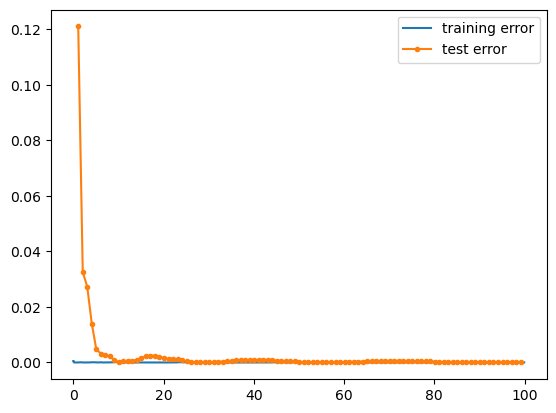

In [239]:
plt.plot(ts, errs_train, label="training error");
plt.plot(tested, errs_test, '.-', label="test error");
plt.legend();

And the testing phase should look like this

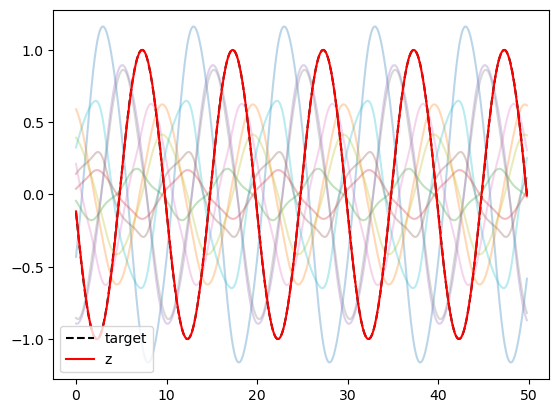

In [241]:
upto = -1
num_plot = 5

plt.plot(ts_test[:upto], xs_test[:upto,:10], alpha=0.3);

plt.plot(ts_test[:upto], zs_desired_best[:upto], '--', color="black", label="target");
plt.plot(ts_test[:upto], zs_best[:upto], '-', color="red", label="z");
plt.legend();

Also, take some time to inspect whether there was any change in the distribution of w weights at all after training

# Where do we  go from here?

If you have the time and the strength, experiment with more complex inputs: can you train a network to generate a Lorenz attractor? Take inspiration from the tasks in this classic work https://www.sciencedirect.com/science/article/pii/S0896627309005479 and use a big network (N~500 or so).